## 실습

In [1]:
import pandas as pd

raw = [
    {"date":"2026-01-01","store":"A","menu":"Americano","price":"4500원","qty":"2","paid":"TRUE"},
    {"date":"2026/01/01","store":"A","menu":"Latte","price":"5,000","qty":1,"paid":"True"},
    {"date":"2026-01-02","store":"A","menu":"Latte","price":None,"qty":2,"paid":"FALSE"},
    {"date":"2026-01-03","store":"B","menu":"Mocha","price":"5500","qty":None,"paid":True},
    {"date":"2026-01-03","store":"B","menu":"Americano","price":"4500","qty":1,"paid":"TRUE"},
    {"date":"2026-01-04","store":"B","menu":"Latte","price":"5000원","qty":"3","paid":"TRUE"},
]
df = pd.DataFrame(raw)
df.head()

,date,store,menu,price,qty,paid
0,2026-01-01,A,Americano,4500원,2,TRUE
1,2026/01/01,A,Latte,"5,000",1,True
2,2026-01-02,A,Latte,None,2,FALSE
3,2026-01-03,B,Mocha,5500,None,True
4,2026-01-03,B,Americano,4500,1,TRUE


## (필수) 최소 전처리

In [2]:
import numpy as np

# 날짜
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# price 숫자화: "4500원", "5,000" 처리
df["price"] = (df["price"].astype("string")
                .str.replace(",", "", regex=False)
                .str.replace("원", "", regex=False))
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# qty 숫자화
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# paid bool로 통일
df["paid"] = (df["paid"].astype("string").str.upper() == "TRUE")

# 매출
df["sales"] = df["price"] * df["qty"]

df

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
1,NaT,A,Latte,5000,1.0,True,5000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>
3,2026-01-03,B,Mocha,5500,NaN,True,<NA>
4,2026-01-03,B,Americano,4500,1.0,True,4500.0
5,2026-01-04,B,Latte,5000,3.0,True,15000.0


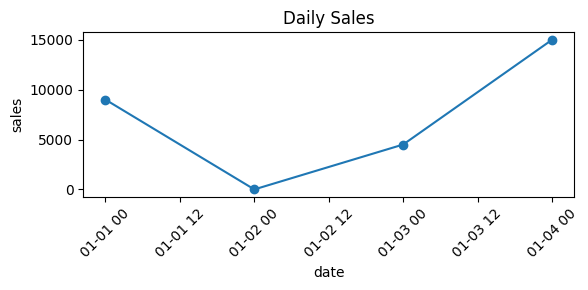

In [3]:
import matplotlib.pyplot as plt

daily = df.groupby("date", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales")
plt.xlabel("date")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

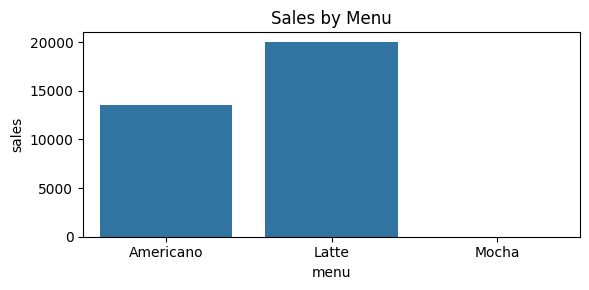

In [4]:
import seaborn as sns

menu_sales = df.groupby("menu", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu")
plt.tight_layout()
plt.show()

# 4. 주요 그래프 유형 맛보기 (핵심은 “언제 쓰는가”)

## (1) 선형 그래프(Line Plot): “시간에 따라 변하나?”

시나리오: “우리 매출이 날짜별로 오르고 있나?”

- 추천: line plot
- 데이터 준비: 날짜 기준 집계(groupby)

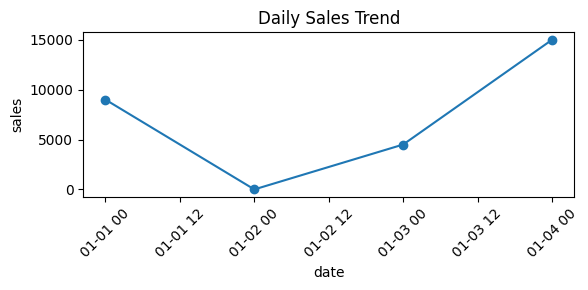

In [5]:
daily = df.groupby("date", as_index=False)["sales"].sum().sort_values("date")

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("date"); plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

해석 템플릿(학생이 그대로 쓰게)
- 관찰: “01-01 대비 01-04에 매출이 (증가/감소)했다.”
- 추정: “(수량/결제성공/가격) 변화가 원인일 수 있어 추가 확인이 필요하다.”

### 미션
- store별로 일별 매출을 나눠서 2개 라인을 그려보기(멀티 라인).

→ 매장별 일별 매출 비교

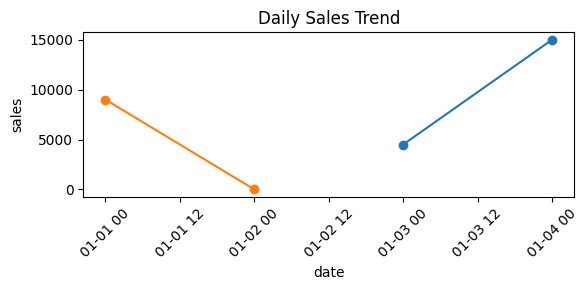

In [12]:
df_a = df[df["store"] == "A"].dropna(subset=["date"]).copy()
daily_a = df_a.groupby("date", as_index=False)["sales"].sum().sort_values("date")

df_b = df[df["store"] == "B"].dropna(subset=["date"]).copy()
daily_b = df_b.groupby("date", as_index=False)["sales"].sum().sort_values("date")

plt.figure(figsize=(6,3))
plt.plot(daily_a["date"], daily_a["sales"], color="tab:orange", marker="o")
plt.plot(daily_b["date"], daily_b["sales"], color="tab:blue", marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("date"); plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## (2) 막대 그래프(Bar Chart): “항목별 비교는?”

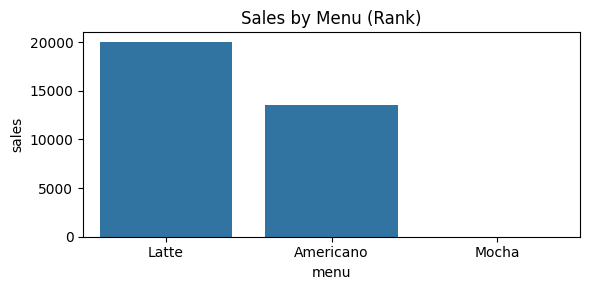

In [ ]:
menu_sales = (df.groupby("menu", as_index=False)["sales"]
            .sum()
            .sort_values("sales", ascending=False))

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu (Rank)")
plt.tight_layout()
plt.show()

### 미션
- qty 기준으로도 동일한 그래프를 그려서 “매출 1등”과 “판매량 1등”이 같은지 비교.

- 비교한 결과, 두 기준의 1등 메뉴는 상이하다.

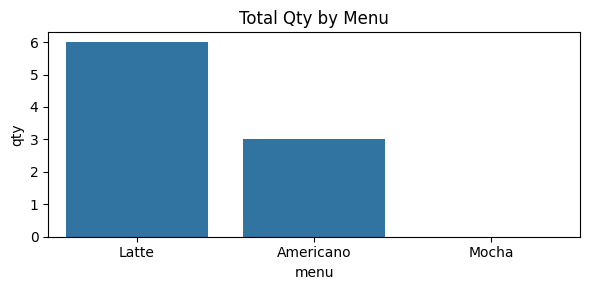

In [21]:
menu_qty = (df.groupby("menu", as_index=False)["qty"]
            .sum()
            .sort_values("qty", ascending=False)
)

plt.figure(figsize=(6,3))
sns.barplot(data=menu_qty, x="menu", y="qty")
plt.title("Total Qty by Menu")
plt.tight_layout()
plt.show()

## (3) 산점도(Scatter Plot): “두 변수는 관계가 있나?”

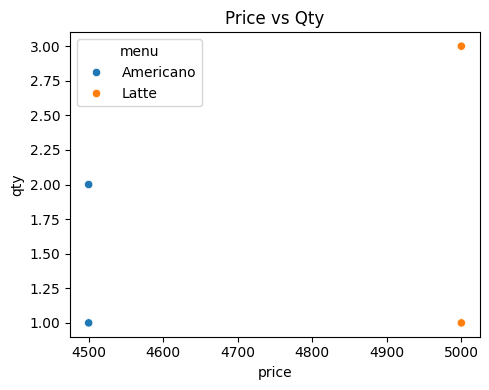

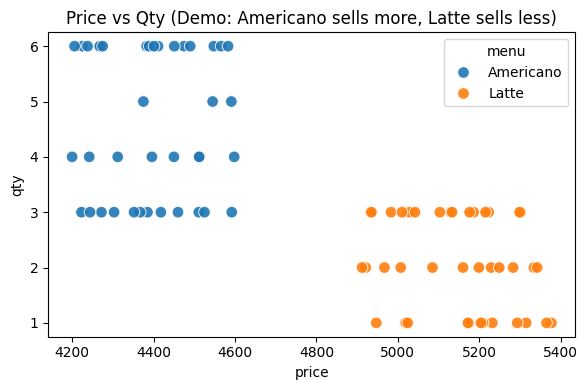

,menu,price,qty,sales
0,Americano,4375,5,21875
1,Americano,4396,4,17584
2,Americano,4225,6,25350
3,Americano,4267,6,25602
4,Americano,4411,6,26466


In [9]:
tmp = df.dropna(subset=["price","qty"])

plt.figure(figsize=(5,4))
sns.scatterplot(data=tmp, x="price", y="qty", hue="menu")
plt.title("Price vs Qty")
plt.tight_layout()
plt.show()

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(7)

n = 40  # 점 개수(원하는 만큼 늘려도 됨)

# Americano: 저가 + 수량 많음
a_price = np.random.randint(4200, 4601, size=n)
a_qty   = np.random.randint(3, 7, size=n)   # 3~6

# Latte: 고가 + 수량 적음
l_price = np.random.randint(4900, 5401, size=n)
l_qty   = np.random.randint(1, 4, size=n)   # 1~3

df_demo = pd.DataFrame({
    "menu":  ["Americano"] * n + ["Latte"] * n,
    "price": np.concatenate([a_price, l_price]),
    "qty":   np.concatenate([a_qty, l_qty]),
})

# (선택) 판매금액도 같이 보고 싶으면
df_demo["sales"] = df_demo["price"] * df_demo["qty"]

# 산점도
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_demo, x="price", y="qty", hue="menu", s=70, alpha=0.9)

plt.title("Price vs Qty (Demo: Americano sells more, Latte sells less)")
plt.xlabel("price")
plt.ylabel("qty")
plt.tight_layout()
plt.show()

df_demo.head()

- sales가 0/NaN이 되는 행이 왜 생겼는지 원인을 적고, 처리 후 다시 그리기.

price 또는 qty 둘중 하나가 결측값(NaN)이면 결과값이 NaN이 된다.<br>
또한 문자열/기호가 섞여 price, qty가 숫자로 못 바뀌면 변환 과정에서 NaN이 생길 수 있다.

## (4) 히스토그램(Histogram): “값의 분포는 어떤가?”

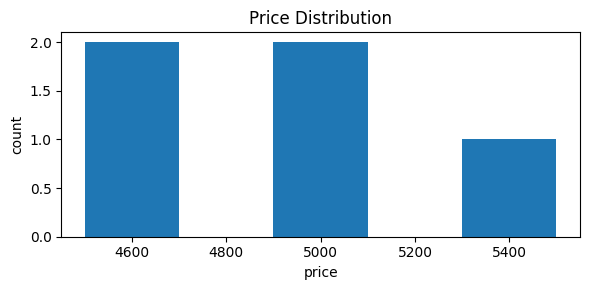

In [10]:
tmp = df.dropna(subset=["price"])

plt.figure(figsize=(6,3))
plt.hist(tmp["price"], bins=5)
plt.title("Price Distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.tight_layout()
plt.show()

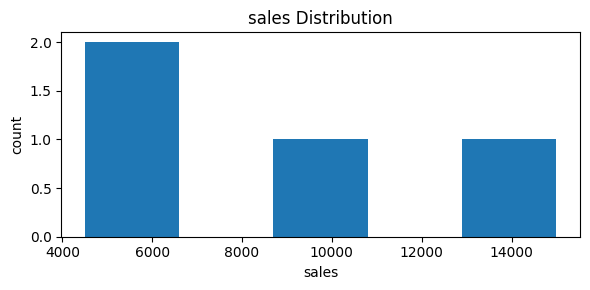

In [17]:
tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
plt.hist(tmp["sales"], bins=5)
plt.title("sales Distribution")
plt.xlabel("sales")
plt.ylabel("count")
plt.tight_layout()
plt.show()

**미션**
- sales(매출) 분포도 확인하고, “한두 건이 전체를 끌어올리는지” 토론하기

<br>

- 히스토그램 상에서 sales 분포는 비교적 좁은 범위에 집중되어 있고, 긴 꼬리나 극단적으로 큰 값(outlier)은 관찰되지 않는다. 한두 건의 매출이 전체를 왜곡한다고 보기는 어렵다.

In [16]:
df

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
1,NaT,A,Latte,5000,1.0,True,5000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>
3,2026-01-03,B,Mocha,5500,NaN,True,<NA>
4,2026-01-03,B,Americano,4500,1.0,True,4500.0
5,2026-01-04,B,Latte,5000,3.0,True,15000.0


##  (5) 박스플롯(Box) & 바이올린(Violin): “이상치/범위 비교”

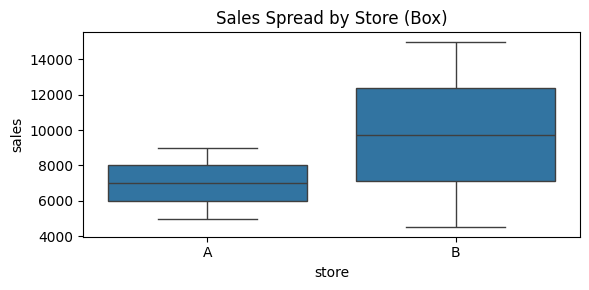

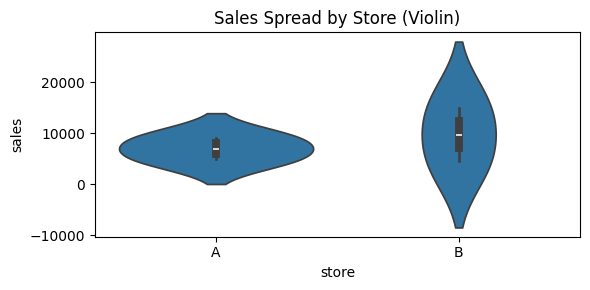

In [11]:
tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Box)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.violinplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Violin)")
plt.tight_layout()
plt.show()

### 미션

- menu별 price 박스플롯을 그려서 “가격 변동이 큰 메뉴”를 찾기.

- 데이터가 너무 적어서 판별불가

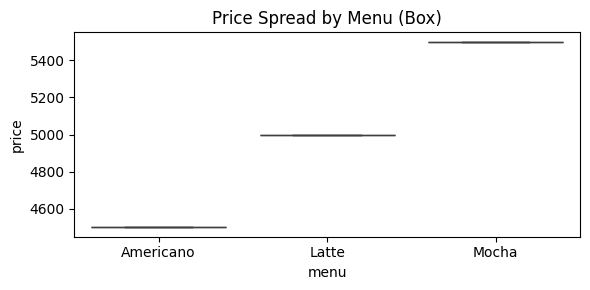

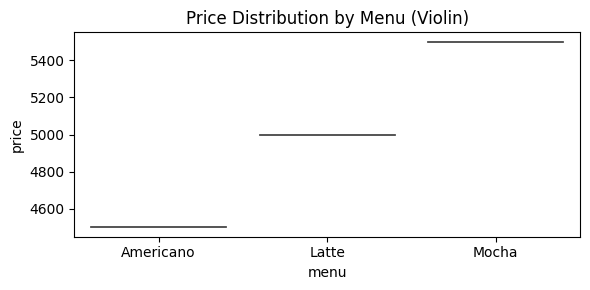

In [19]:
tmp = df.dropna(subset=["price"])

plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="menu", y="price")
plt.title("Price Spread by Menu (Box)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.violinplot(data=tmp, x="menu", y="price")
plt.title("Price Distribution by Menu (Violin)")
plt.tight_layout()
plt.show()

# 미션 실습 1
요구 결과(그래프 4개)
- 일별 총매출 추이(Line)
- 메뉴별 매출 순위(Bar)
- 가격 vs 수량 관계(Scatter)
- 매장별 매출 분포(Box 또는 Violin)

1. 일별 총매출 추이(Line)<br>
일별 총매출 추이를 통해 전체 매출 흐름과 특정 날짜의 변동을 확인 할수 있었다

2. 메뉴별 매출 순위(Bar)<br>
메뉴별 매출 합계를 비교해 매출 기여도가 가장 높은 메뉴를 파악 할수 있었다

3. 가격 vs 수량 관계(Scatter) <br>
가격과 판매량 간 관계를 통해 고가 메뉴의 판매 특성을 확인 할수 있었다

4. 매장별 매출 분포(Box 또는 Violin)<br>
매장별 매출 분포를 비교해 변동성과 안정성을 분석 할수 있었다

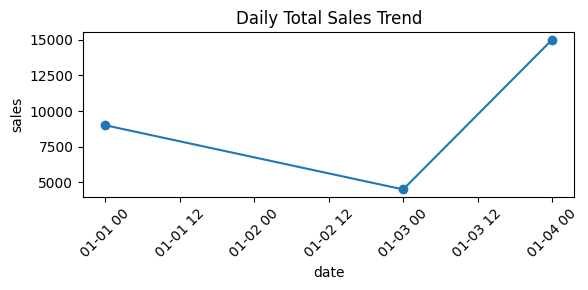

In [ ]:
daily_sales = (
    tmp.groupby("date", as_index=False)["sales"]
        .sum()
        .sort_values("date")
)

plt.figure(figsize=(6,3))
plt.plot(daily_sales["date"], daily_sales["sales"], marker="o")
plt.title("Daily Total Sales Trend")
plt.xlabel("date"); plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


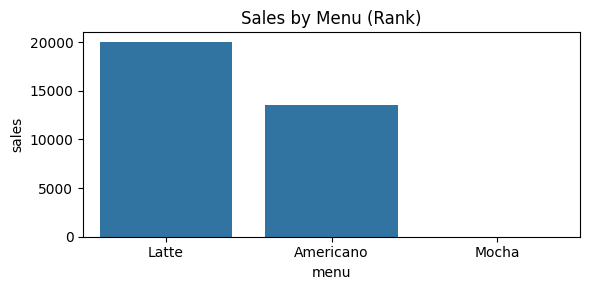

In [25]:
menu_sales = (
    tmp.groupby("menu", as_index=False)["sales"]
        .sum()
        .sort_values("sales", ascending=False)
)

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu (Rank)")
plt.tight_layout()
plt.show()


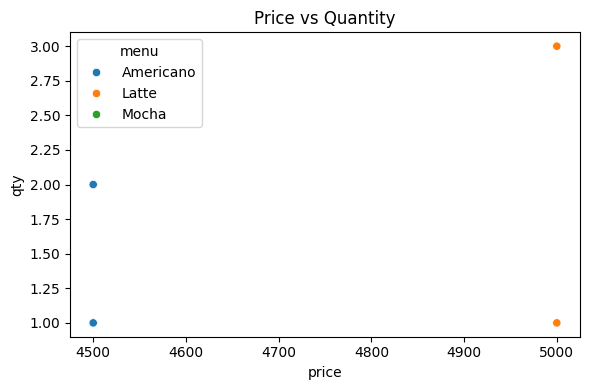

In [26]:
plt.figure(figsize=(6,4))
sns.scatterplot(data=tmp, x="price", y="qty", hue="menu")
plt.title("Price vs Quantity")
plt.tight_layout()
plt.show()


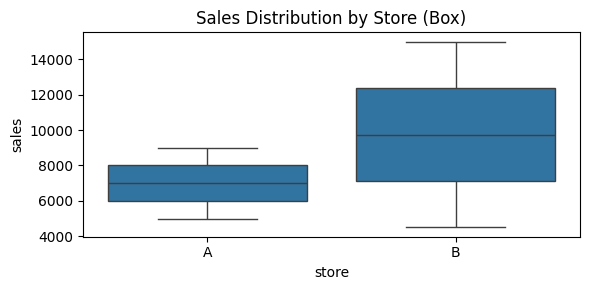

In [27]:
plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="store", y="sales")
plt.title("Sales Distribution by Store (Box)")
plt.tight_layout()
plt.show()


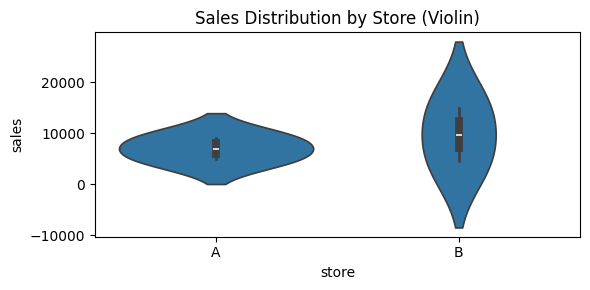

In [28]:
plt.figure(figsize=(6,3))
sns.violinplot(data=tmp, x="store", y="sales")
plt.title("Sales Distribution by Store (Violin)")
plt.tight_layout()
plt.show()


# 미션 실습 2
그래프 예쁘게 꾸미기 (간단 버전: 초보 필수 7개)<br>
“꾸미기”는 최소만, 대신 바로 효과가 나는 것만 합니다

- figsize로 크기 조절
- title, xlabel, ylabel
- xticks(rotation=45)
- tight_layout()
- 범례: plt.legend() 또는 seaborn의 hue
- 정렬 후 그리기(순위 그래프는 꼭 정렬)
- 결측 제거/대체 후 그리기(그래프 오류 예방)